# Evaluation Regression Model Exercises

### Import the required libraries (some libraries are imported in-line)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import viz

from evaluate import get_tips_data, prep_tips,visualize_tips, visual_tip

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')


## Perform the initial examination of the data

In [2]:
tips = get_tips_data()
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


## Examine the data 

In [3]:
# Check the summary structure
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [4]:
# Dtypes

tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [5]:
# Shape of the data
tips.shape

(244, 7)

In [6]:
# Check missing values
tips.value_counts().isnull().sum()

0

## Clean and prepare the tips dataset

>- ### No splitting required for this dataset

In [7]:
clean_tips = prep_tips()
tips = clean_tips
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
np.array(tips[['total_bill', 'tip']].to_numpy())

array([[16.99,  1.01],
       [10.34,  1.66],
       [21.01,  3.5 ],
       [23.68,  3.31],
       [24.59,  3.61],
       [25.29,  4.71],
       [ 8.77,  2.  ],
       [26.88,  3.12],
       [15.04,  1.96],
       [14.78,  3.23],
       [10.27,  1.71],
       [35.26,  5.  ],
       [15.42,  1.57],
       [18.43,  3.  ],
       [14.83,  3.02],
       [21.58,  3.92],
       [10.33,  1.67],
       [16.29,  3.71],
       [16.97,  3.5 ],
       [20.65,  3.35],
       [17.92,  4.08],
       [20.29,  2.75],
       [15.77,  2.23],
       [39.42,  7.58],
       [19.82,  3.18],
       [17.81,  2.34],
       [13.37,  2.  ],
       [12.69,  2.  ],
       [21.7 ,  4.3 ],
       [19.65,  3.  ],
       [ 9.55,  1.45],
       [18.35,  2.5 ],
       [15.06,  3.  ],
       [20.69,  2.45],
       [17.78,  3.27],
       [24.06,  3.6 ],
       [16.31,  2.  ],
       [16.93,  3.07],
       [18.69,  2.31],
       [31.27,  5.  ],
       [16.04,  2.24],
       [17.46,  2.54],
       [13.94,  3.06],
       [ 9.

In [9]:
# Reshape the array and rename the columns

tips_features = pd.DataFrame(np.array(tips[['total_bill', 'tip']].to_numpy()), columns = ['total_bill', 'tip'])
tips_features.head(3)

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50


In [10]:
# Map X, and y to features of interest and check lenght

X = tips_features['total_bill']
y = tips_features['tip']

## Visualize features of interest 

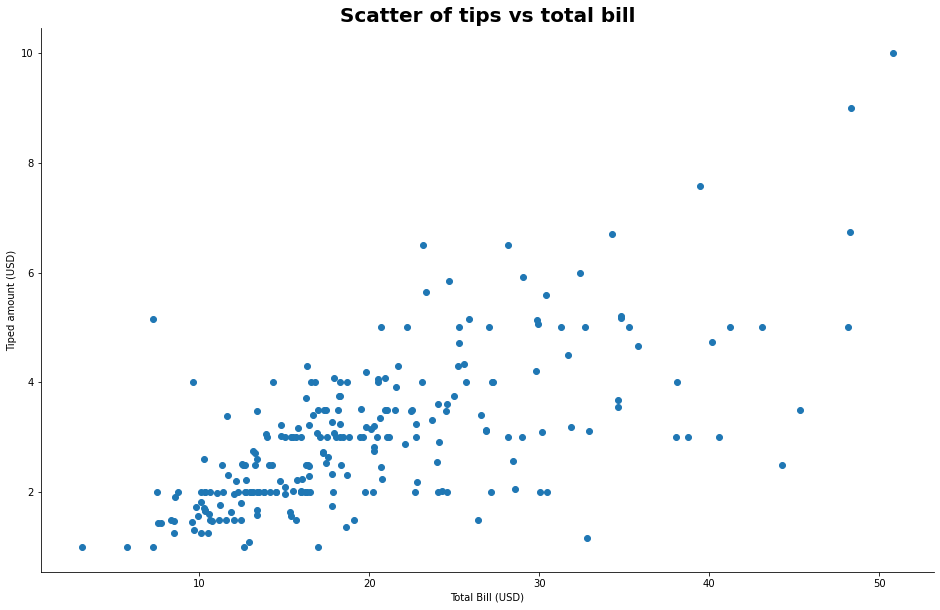

In [11]:
plt.figure(figsize = (16, 10))
plt.scatter(X, y)
plt.title('Scatter of tips vs total bill', color = 'black', weight = 'bold', size = 20)
plt.xlabel('Total Bill (USD)', size = 10, color = 'black')
plt.ylabel('Tiped amount (USD)')
plt.show()

## Take aways:
>- #### Total bill and tips are in the right data type (float)
>- #### The data contains no missing value

### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

### Create a yhat baseline

In [12]:
tips_features['yhat_baseline'] = tips_features['tip'].mean()

In [13]:
tips_features.head()

,total_bill,tip,yhat_baseline
0,16.99,1.01,3.002387
1,10.34,1.66,3.002387
2,21.01,3.50,3.002387
3,23.68,3.31,3.002387
4,24.59,3.61,3.002387


### Build the model

In [14]:
# Import the required library
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Fit the model 
model.fit(tips_features[['total_bill']], tips_features.tip)

# compute predictions and add to original dataframe
tips_features['yhat_predicted'] = model.predict(tips_features[['total_bill']])

tips_features.head(3)


,total_bill,tip,yhat_baseline,yhat_predicted
0,16.99,1.01,3.002387,2.706097
1,10.34,1.66,3.002387,2.008358
2,21.01,3.50,3.002387,3.127889


### (3). Plot the residuals for the linear regression model that you made.



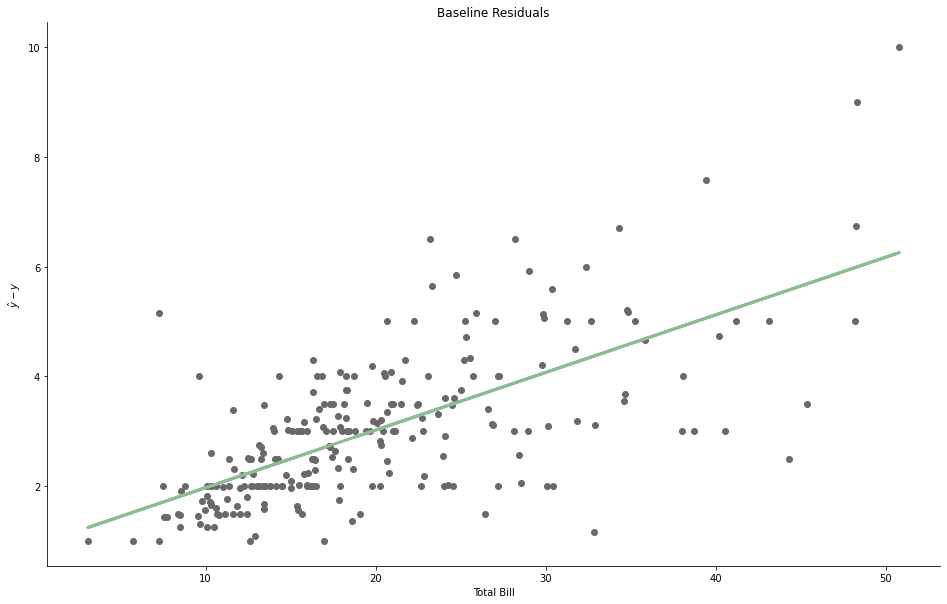

In [15]:
visual_tip(tips_features, X, y)
